## 2. Splitting and exploration

In this part we will explore distributions of different variables in our dataset.

## Train-test split

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from helpers import random_seed

np.random.seed(random_seed)

In [2]:
# readin the data
df = pd.read_csv(f'../data/dataset.csv', index_col=0)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 529623 entries, 0 to 536964
Data columns (total 18 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   R_Depth     529623 non-null  float64
 1   R_TEMP      529623 non-null  float64
 2   R_SALINITY  507022 non-null  float64
 3   R_SIGMA     507018 non-null  float64
 4   R_SVA       507022 non-null  float64
 5   R_DYNHT     510686 non-null  float64
 6   R_O2        401864 non-null  float64
 7   R_O2Sat     389160 non-null  float64
 8   R_SIO3      220644 non-null  float64
 9   R_PO4       245209 non-null  float64
 10  R_NO3       209057 non-null  float64
 11  R_NO2       208738 non-null  float64
 12  R_NH4       43565 non-null   float64
 13  R_CHLA      145972 non-null  float64
 14  R_PHAEO     145967 non-null  float64
 15  R_PRES      529623 non-null  float64
 16  Lat_Dec     529623 non-null  float64
 17  Lon_Dec     529623 non-null  float64
dtypes: float64(18)
memory usage: 76.8 MB


We have also noticed that some of the feature values are negative despite they actually should be positive (such as concentrations). We'll replace negative values with NaN soon.

In [4]:
df.min()

R_Depth         0.000000
R_TEMP          1.440000
R_SALINITY     28.431000
R_SIGMA        20.934000
R_SVA           7.300000
R_DYNHT         0.000000
R_O2           -0.010000
R_O2Sat        -0.100000
R_SIO3          0.000000
R_PO4           0.000000
R_NO3          -0.400000
R_NO2           0.000000
R_NH4           0.000000
R_CHLA         -0.010000
R_PHAEO        -3.890000
R_PRES          0.000000
Lat_Dec        18.416666
Lon_Dec      -164.083333
dtype: float64

Perform a random train-test split of the data.

In [5]:
train_df, test_df = train_test_split(df, test_size=0.3, random_state=random_seed)

print(train_df.shape, test_df.shape)

(370736, 18) (158887, 18)


## Exploring the data

Let's explore the distribution of the features, and investigate the missing values.

In [6]:
def hist_plot(dataset, f_size=(10, 5)):
    plt.figure(figsize=f_size)
    sns.histplot(data=dataset, kde=False, bins=50)
    plt.plot()

def box_plot(dataset, f_size=(10, 5)):
    plt.figure(figsize=f_size)
    sns.boxplot(data=dataset.values)
    plt.plot()

In [7]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : 'Percentage'})


        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        'Percentage', ascending=False).round(1)

        # Print some summary information
        print ("The dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        print('The dataset also has ' + str(df.shape[0]) + ' rows.')

        return mis_val_table_ren_columns

def replace_neg_with_nan(col):
    print(train_df[train_df[col] < 0].shape, test_df[test_df[col] < 0].shape)

    train_df.loc[train_df[col] < 0, col] = np.nan
    test_df.loc[test_df[col] < 0, col] = np.nan

    print(train_df[train_df[col] < 0].shape, test_df[test_df[col] < 0].shape)

In [8]:
print(missing_values_table(train_df))

The dataframe has 18 columns.
There are 13 columns that have missing values.
The dataset also has 370736 rows.
            Missing Values  Percentage
R_NH4               340397        91.8
R_PHAEO             268578        72.4
R_CHLA              268574        72.4
R_NO2               224748        60.6
R_NO3               224575        60.6
R_SIO3              216467        58.4
R_PO4               199290        53.8
R_O2Sat              98452        26.6
R_O2                 89556        24.2
R_SIGMA              15893         4.3
R_SALINITY           15890         4.3
R_SVA                15890         4.3
R_DYNHT              13298         3.6


# Below we will look at the features and their distributions

### R_Depth

Reported Depth in meters

c:\Users\shele\anaconda3\envs\calcofi\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


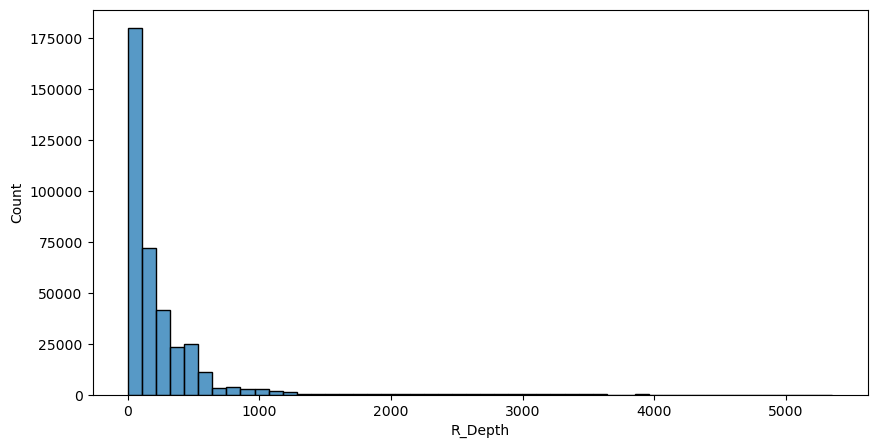

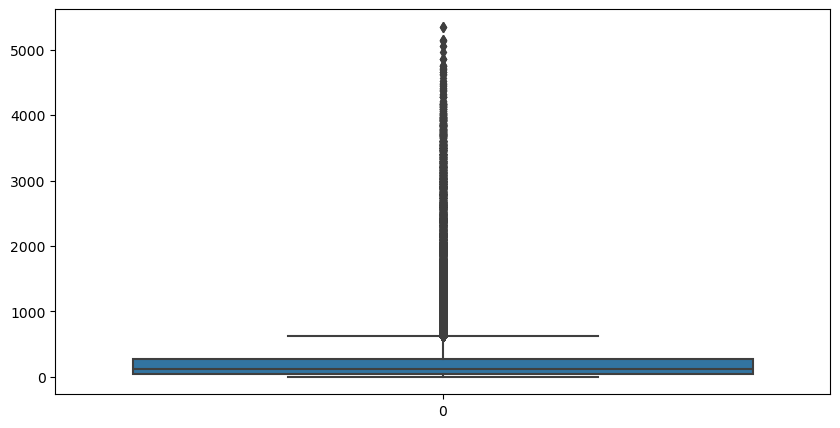

In [9]:
hist_plot(train_df['R_Depth'])
box_plot(train_df['R_Depth'])

#### R_TEMP

Reported Temperature

In [10]:
train_df['R_TEMP'].describe()

count    370736.000000
mean         10.987534
std           4.166135
min           1.440000
25%           7.920000
50%          10.310000
75%          13.980000
max          31.140000
Name: R_TEMP, dtype: float64

c:\Users\shele\anaconda3\envs\calcofi\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


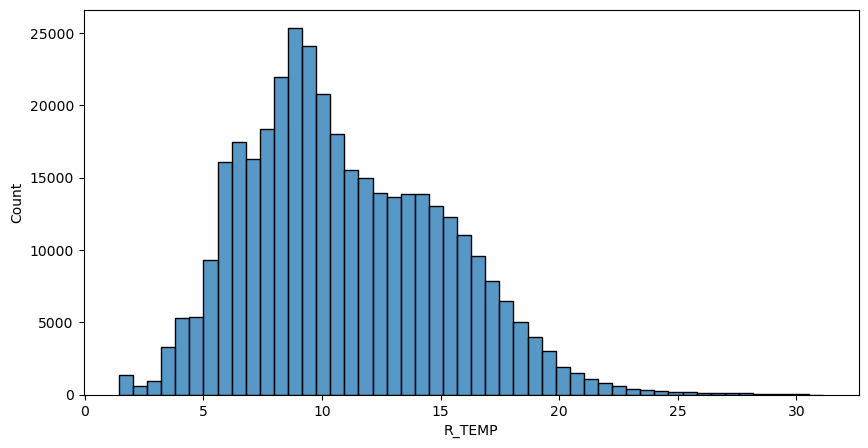

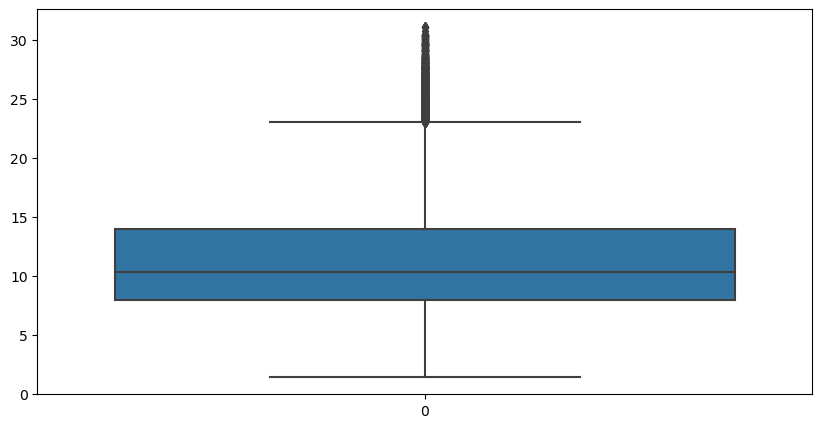

In [11]:
hist_plot(train_df['R_TEMP'])
box_plot(train_df['R_TEMP'])

#### R_SALINITY

Reported Salinity

In [12]:
train_df['R_SALINITY'].describe()

count    354846.000000
mean         33.821691
std           0.459572
min          28.431000
25%          33.478250
50%          33.826000
75%          34.175000
max          36.641000
Name: R_SALINITY, dtype: float64

c:\Users\shele\anaconda3\envs\calcofi\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


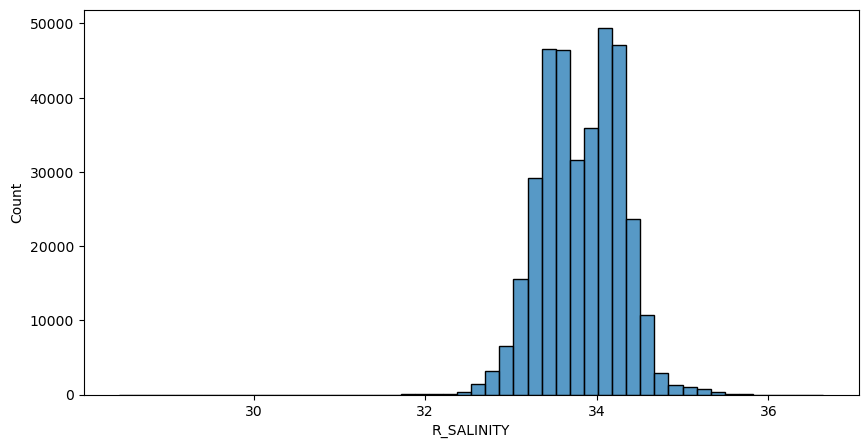

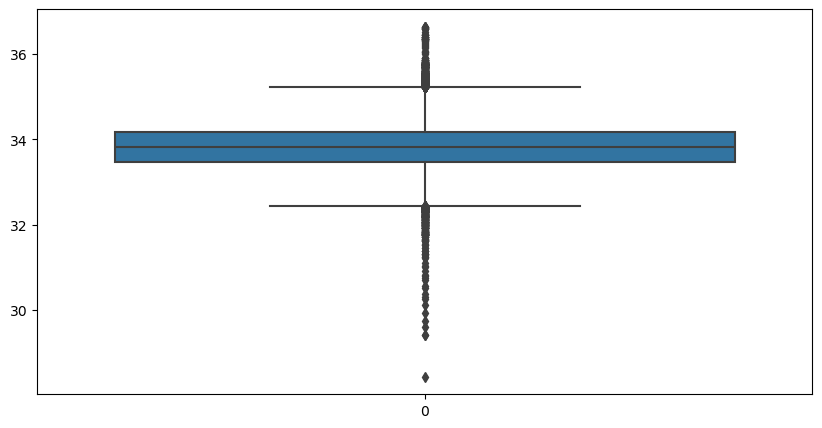

In [13]:
hist_plot(train_df['R_SALINITY'])
box_plot(train_df['R_SALINITY'])

#### R_SIGMA

Reported Potential Density of water

In [14]:
train_df['R_SIGMA'].describe()

count    354843.000000
mean         25.767746
std           0.991063
min          20.934000
25%          24.940000
50%          25.900000
75%          26.600000
max          28.139000
Name: R_SIGMA, dtype: float64

c:\Users\shele\anaconda3\envs\calcofi\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


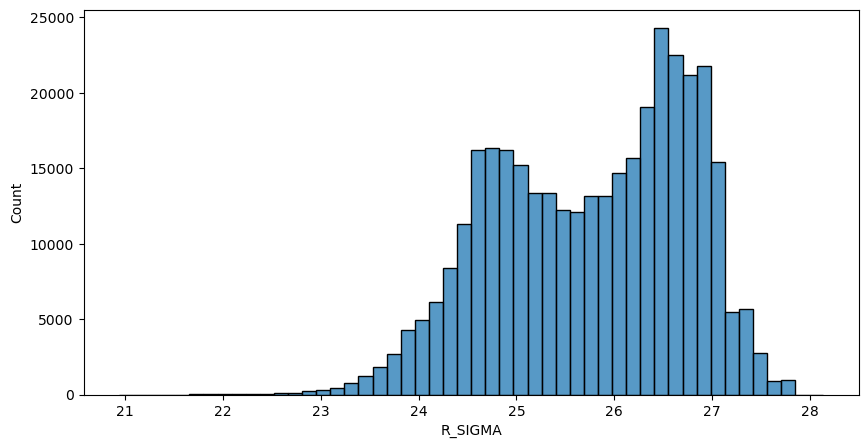

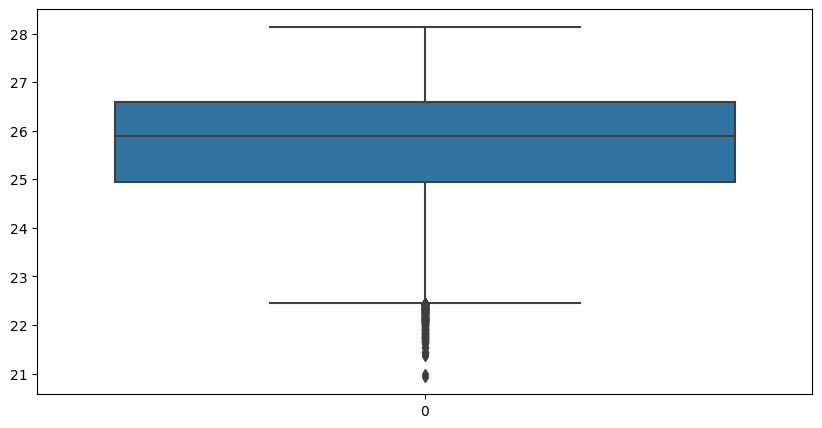

In [15]:
hist_plot(train_df['R_SIGMA'])
box_plot(train_df['R_SIGMA'])

#### R_SVA

Reported Specific Volume Anomaly

In [16]:
train_df['R_SVA'].describe()

count    354846.000000
mean        224.778217
std          91.992151
min           7.300000
25%         147.100000
50%         211.000000
75%         301.600000
max         683.400000
Name: R_SVA, dtype: float64

c:\Users\shele\anaconda3\envs\calcofi\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


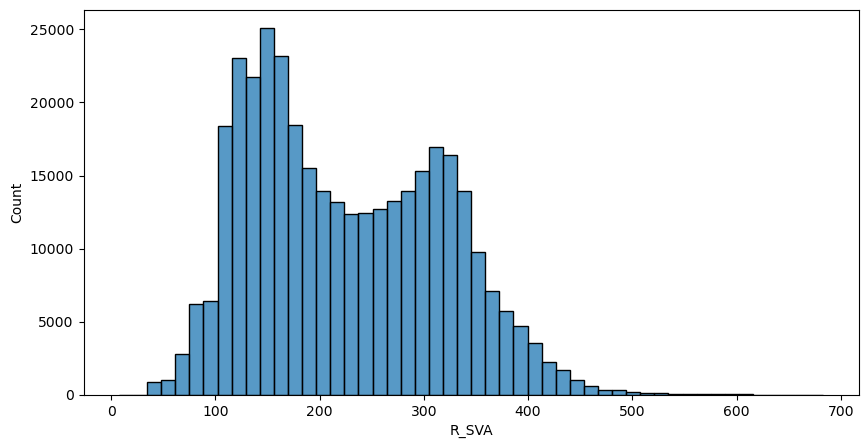

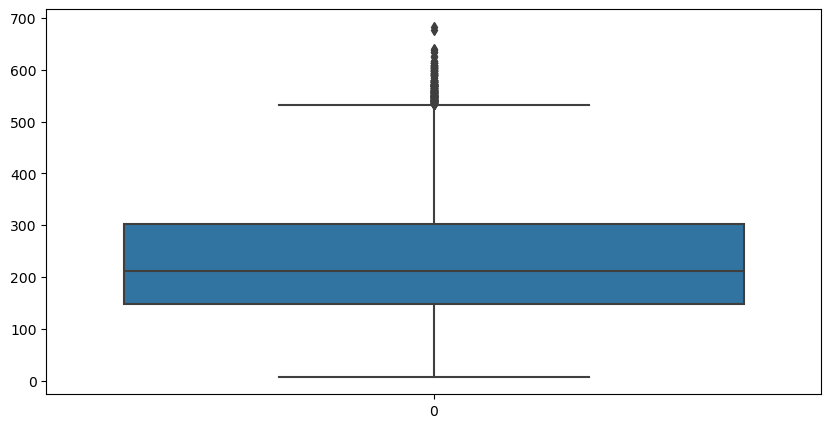

In [17]:
hist_plot(train_df['R_SVA'])
box_plot(train_df['R_SVA'])

#### R_DYNHT

Reported Dynamic Height in units of dynamic meters (work per unit mass)

In [18]:
train_df['R_DYNHT'].describe()

count    357438.000000
mean          0.408438
std           0.360718
min           0.000000
25%           0.130000
50%           0.320000
75%           0.609000
max           3.880000
Name: R_DYNHT, dtype: float64

c:\Users\shele\anaconda3\envs\calcofi\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


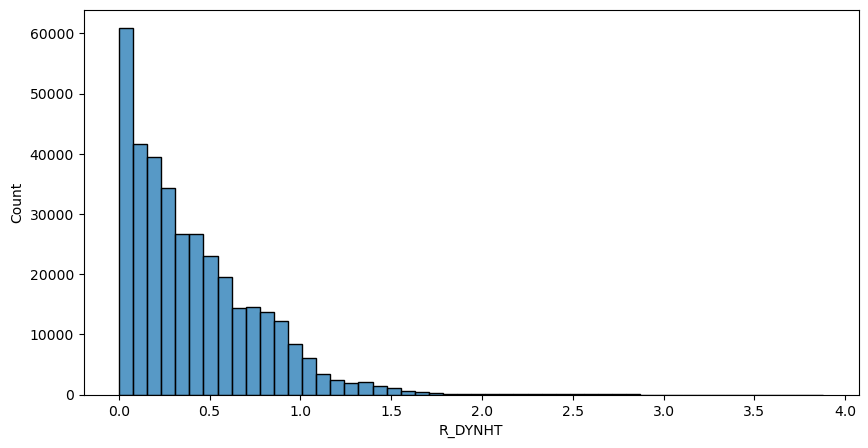

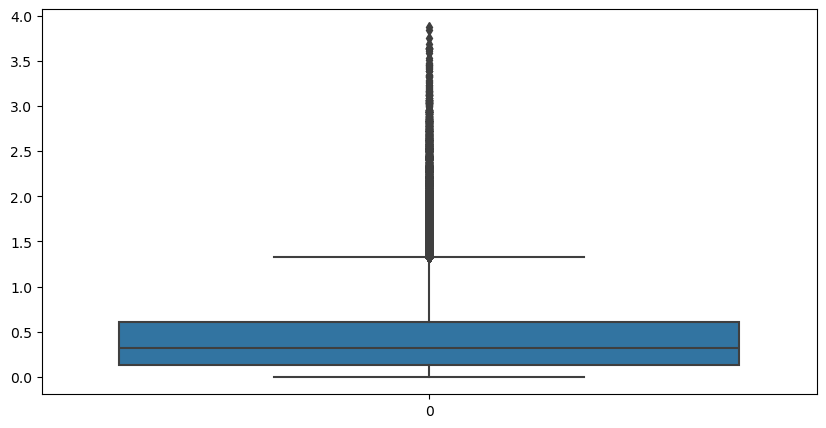

In [19]:
hist_plot(train_df['R_DYNHT'])
box_plot(train_df['R_DYNHT'])

#### R_O2

Here the multimodality is prominent. Also some of the values are negative, replace them with zero.

In [20]:
train_df['R_O2'].describe()

count    281180.000000
mean          3.509848
std           2.053090
min          -0.010000
25%           1.560000
50%           3.680000
75%           5.540000
max          11.130000
Name: R_O2, dtype: float64

In [21]:
replace_neg_with_nan('R_O2')

(3, 18) (1, 18)
(0, 18) (0, 18)


c:\Users\shele\anaconda3\envs\calcofi\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


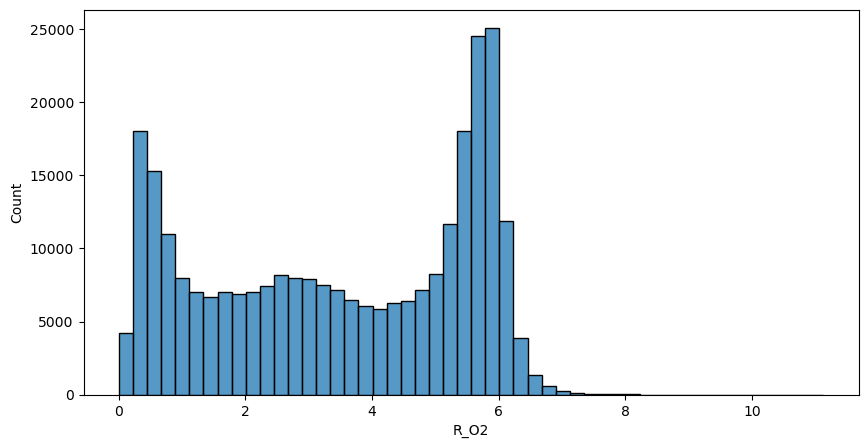

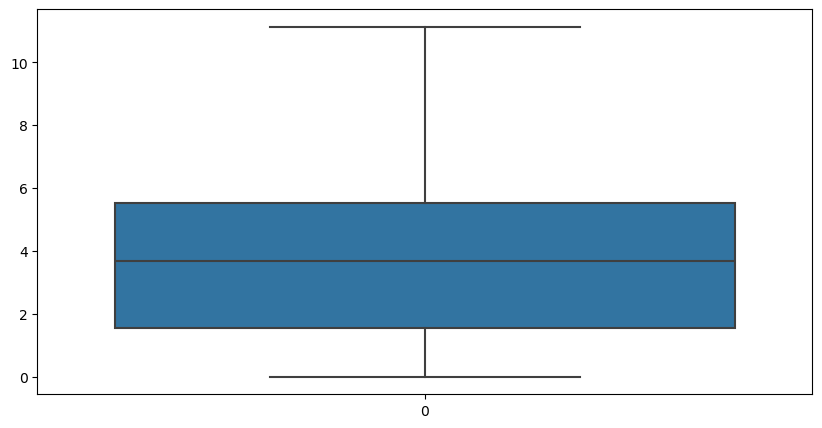

In [22]:
hist_plot(train_df['R_O2'])
box_plot(train_df['R_O2'])

#### R_O2Sat

Reported Oxygen Saturation

Here also some values are negative. Replace them with NaN

In [23]:
replace_neg_with_nan('R_O2Sat')

(3, 18) (1, 18)
(0, 18) (0, 18)


In [24]:
train_df['R_O2Sat'].describe()

count    272281.000000
mean         59.232880
std          36.708119
min           0.000000
25%          24.500000
50%          58.800000
75%          98.200000
max         214.100000
Name: R_O2Sat, dtype: float64

c:\Users\shele\anaconda3\envs\calcofi\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


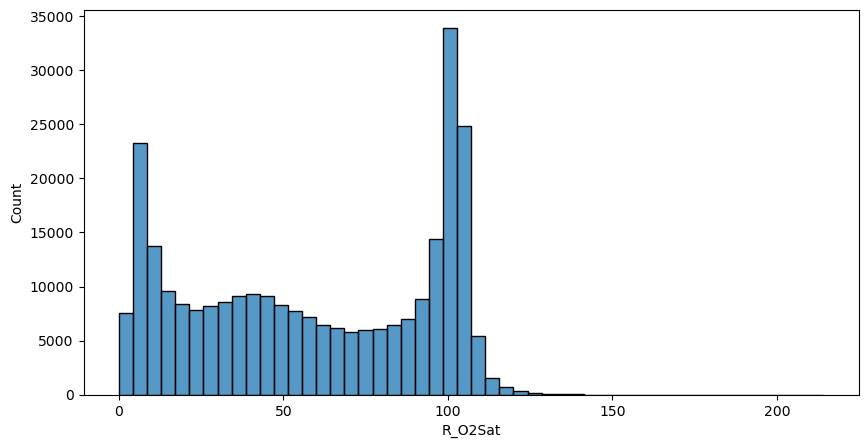

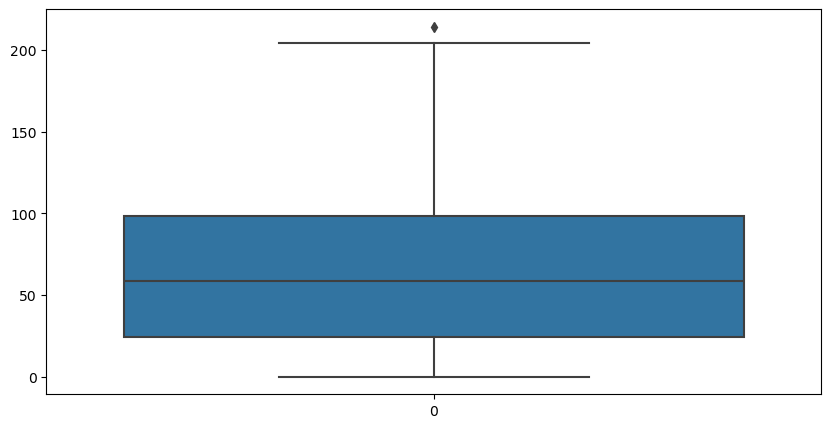

In [25]:
hist_plot(train_df['R_O2Sat'])
box_plot(train_df['R_O2Sat'])

#### R_SIO3

Reported Silicate Concentration

In [26]:
train_df['R_SIO3'].describe()

count    154269.000000
mean         25.605128
std          26.745708
min           0.000000
25%           3.200000
50%          16.700000
75%          39.600000
max         196.000000
Name: R_SIO3, dtype: float64

c:\Users\shele\anaconda3\envs\calcofi\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


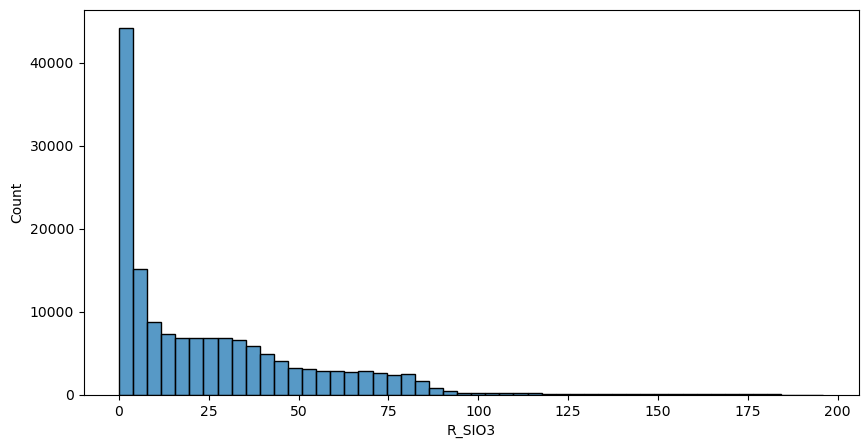

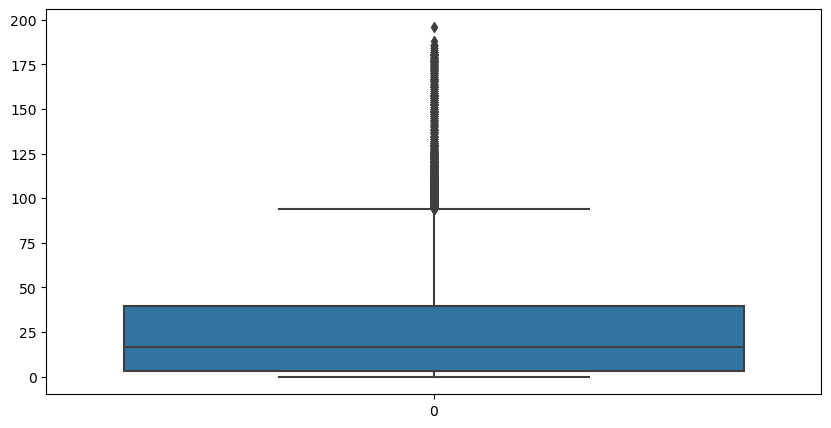

In [27]:
hist_plot(train_df['R_SIO3'])
box_plot(train_df['R_SIO3'])

#### R_PO4

Reported Phosphate Concentration

In [28]:
train_df['R_PO4'].describe()

count    171446.000000
mean          1.502436
std           1.013019
min           0.000000
25%           0.450000
50%           1.450000
75%           2.360000
max           5.210000
Name: R_PO4, dtype: float64

c:\Users\shele\anaconda3\envs\calcofi\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


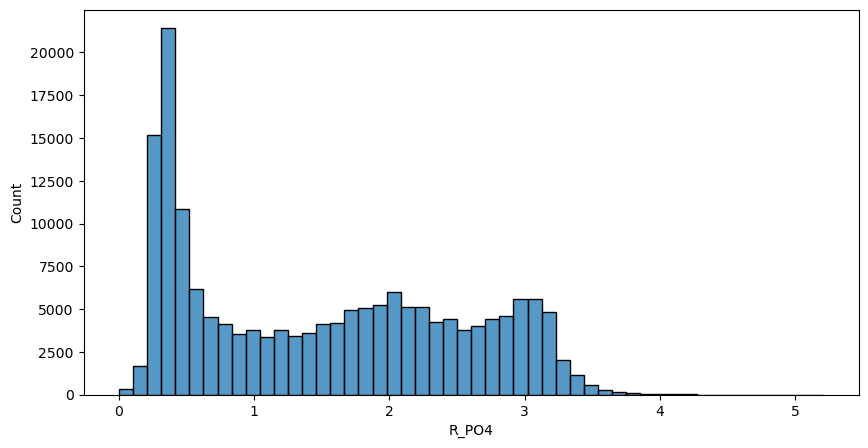

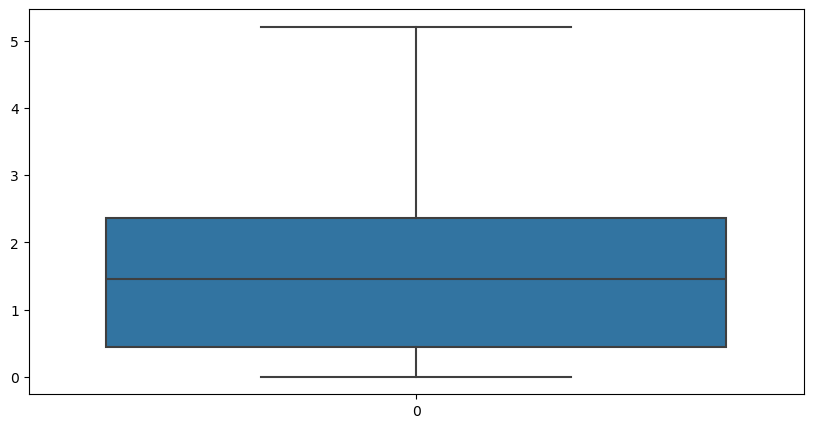

In [29]:
hist_plot(train_df['R_PO4'])
box_plot(train_df['R_PO4'])

#### R_NO3

Reported Nitrate Concentration

In [30]:
train_df['R_NO3'].describe()

count    146161.000000
mean         16.970402
std          14.352701
min          -0.400000
25%           0.800000
50%          17.100000
75%          29.300000
max          95.000000
Name: R_NO3, dtype: float64

In [31]:
replace_neg_with_nan('R_NO3')

(4, 18) (0, 18)
(0, 18) (0, 18)


c:\Users\shele\anaconda3\envs\calcofi\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


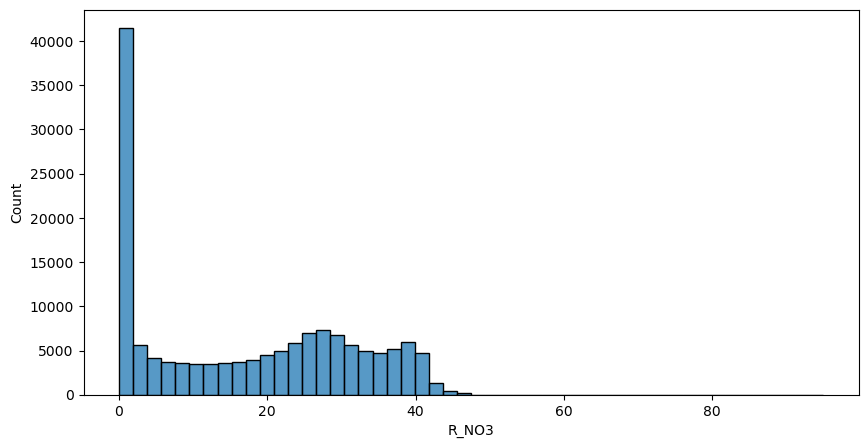

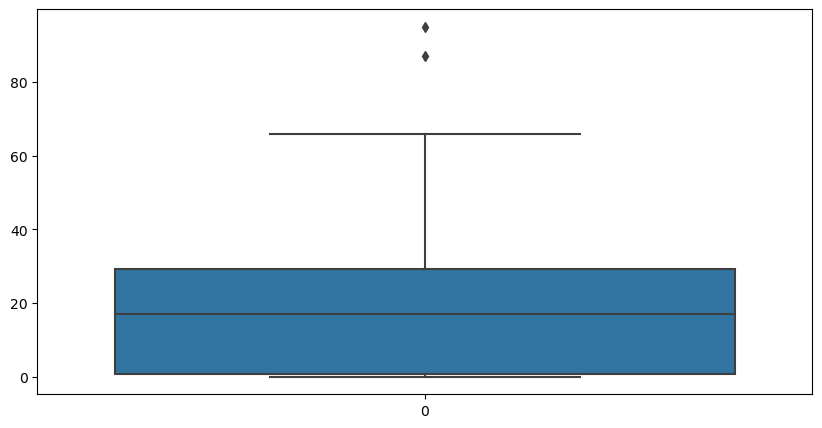

In [32]:
hist_plot(train_df['R_NO3'])
box_plot(train_df['R_NO3'])

#### R_NO2

Reported Nitrite Concentration

In [33]:
train_df['R_NO2'].describe()

count    145988.000000
mean          0.047392
std           0.118605
min           0.000000
25%           0.000000
50%           0.010000
75%           0.040000
max           8.190000
Name: R_NO2, dtype: float64

c:\Users\shele\anaconda3\envs\calcofi\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


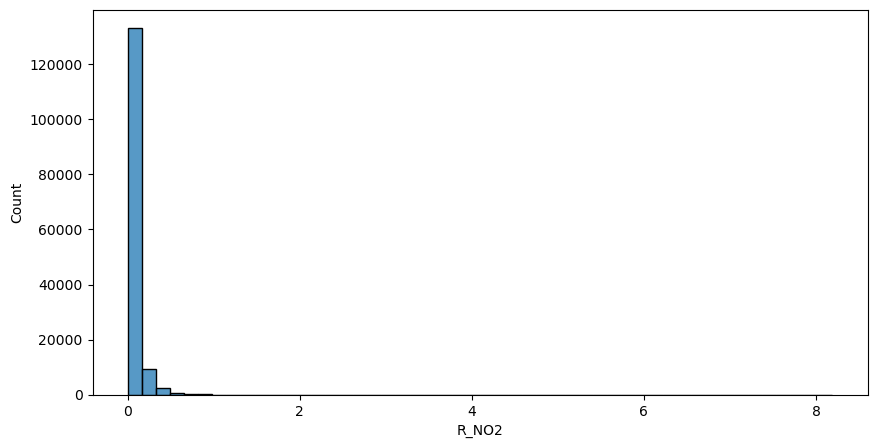

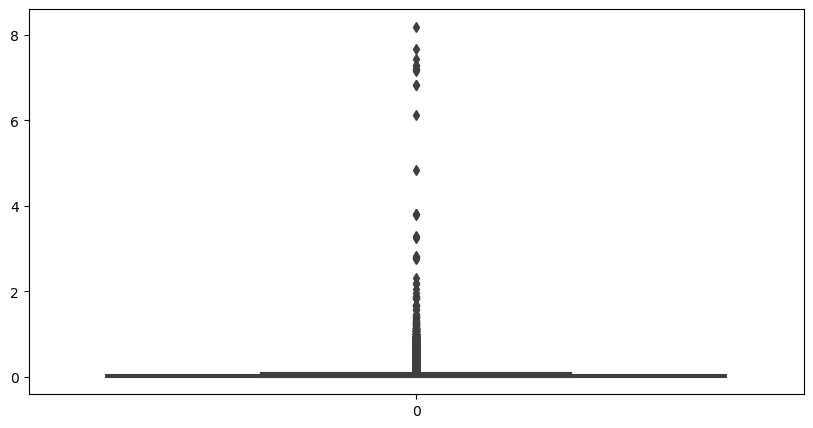

In [34]:
hist_plot(train_df['R_NO2'])
box_plot(train_df['R_NO2'])

#### R_NH4

Reported Ammonium Concentration

In [35]:
train_df['R_NH4'].describe()

count    30339.000000
mean         0.094127
std          0.284699
min          0.000000
25%          0.000000
50%          0.010000
75%          0.070000
max         11.650000
Name: R_NH4, dtype: float64

c:\Users\shele\anaconda3\envs\calcofi\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


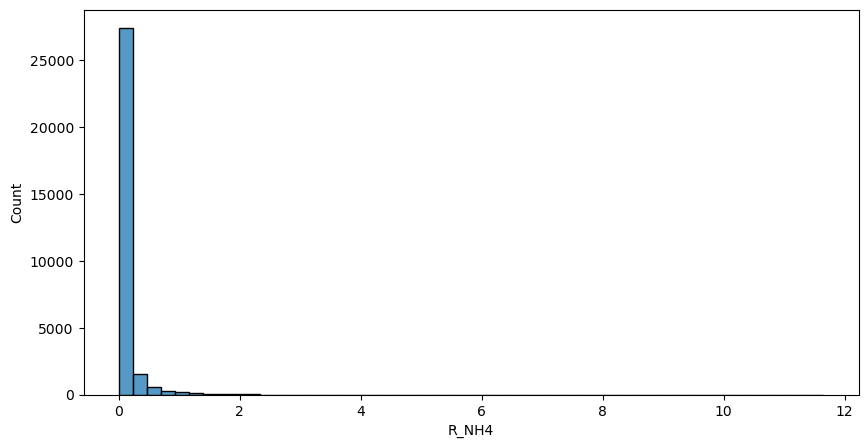

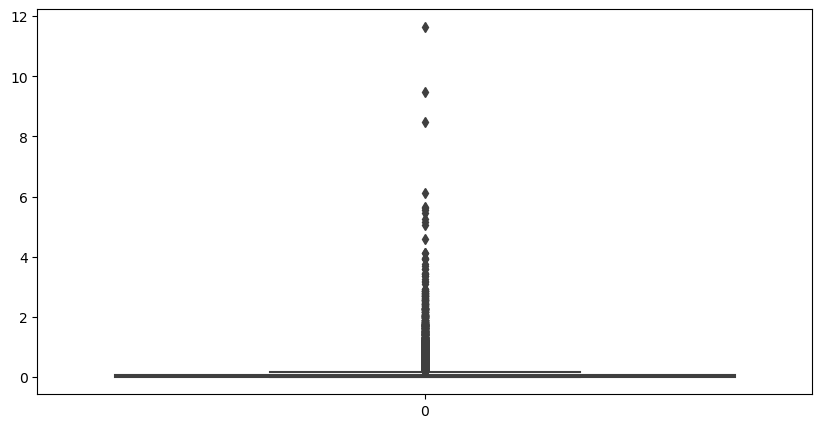

In [36]:
hist_plot(train_df['R_NH4'])
box_plot(train_df['R_NH4'])

#### R_CHLA

Reported Chlorophyll-a

In [37]:
train_df['R_CHLA'].describe()

count    102162.000000
mean          0.458608
std           1.221873
min          -0.010000
25%           0.050000
50%           0.170000
75%           0.400000
max          66.110000
Name: R_CHLA, dtype: float64

In [38]:
replace_neg_with_nan('R_CHLA')

(1, 18) (0, 18)
(0, 18) (0, 18)


c:\Users\shele\anaconda3\envs\calcofi\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


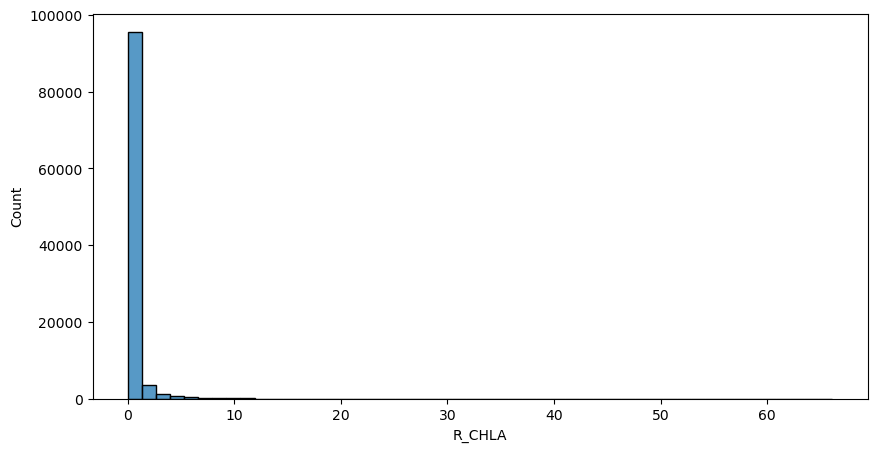

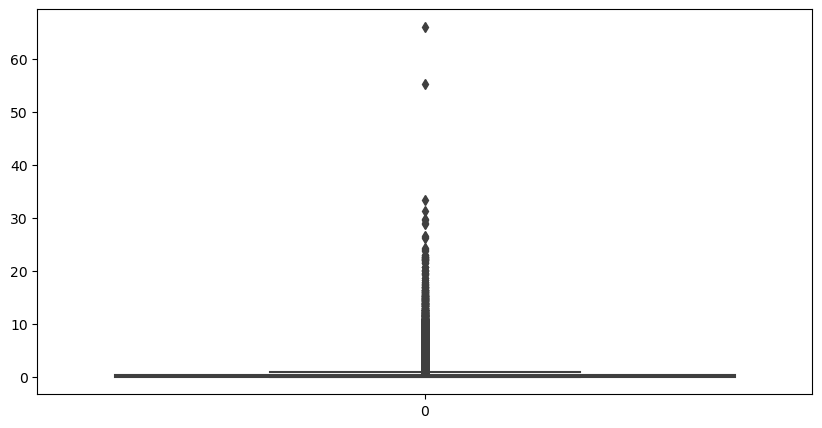

In [39]:
hist_plot(train_df['R_CHLA'])
box_plot(train_df['R_CHLA'])

#### R_PHAEO

Reported Phaeophytin

Some of the values are negative. Replace them with NaN.

In [40]:
train_df['R_PHAEO'].describe()

count    102158.000000
mean          0.205486
std           0.413944
min          -3.890000
25%           0.050000
50%           0.110000
75%           0.240000
max          65.300000
Name: R_PHAEO, dtype: float64

In [41]:
replace_neg_with_nan('R_PHAEO')

(22, 18) (7, 18)
(0, 18) (0, 18)


c:\Users\shele\anaconda3\envs\calcofi\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


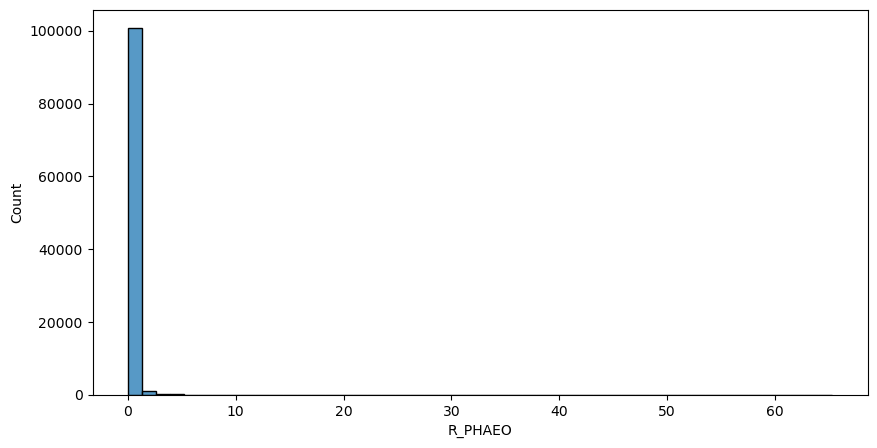

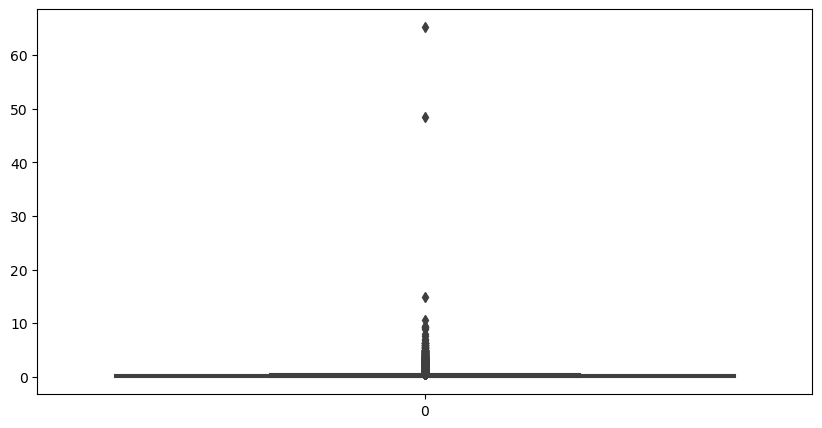

In [42]:
hist_plot(train_df['R_PHAEO'])
box_plot(train_df['R_PHAEO'])

#### Lat_Dec
Latitude

In [43]:
train_df['Lat_Dec'].describe()

count    370736.000000
mean         31.798429
std           3.619283
min          18.416666
25%          29.870000
50%          32.346666
75%          33.745000
max          47.916666
Name: Lat_Dec, dtype: float64

c:\Users\shele\anaconda3\envs\calcofi\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


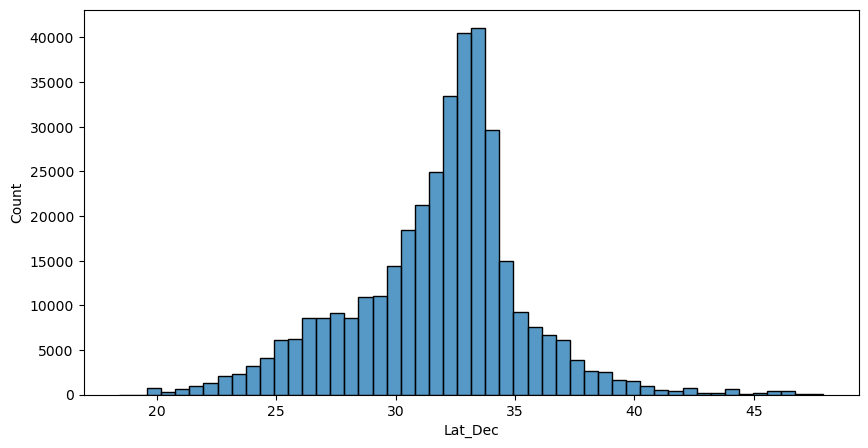

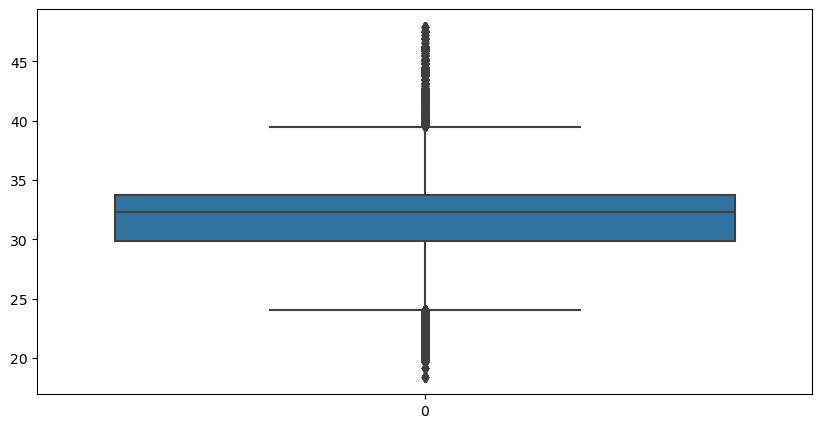

In [44]:
hist_plot(train_df['Lat_Dec'])
box_plot(train_df['Lat_Dec'])

#### Lon_Dec
Longitude

In [45]:
train_df['Lon_Dec'].describe()

count    370736.000000
mean       -120.073596
std           3.991729
min        -164.083333
25%        -122.358333
50%        -120.020000
75%        -117.781666
max        -105.966666
Name: Lon_Dec, dtype: float64

c:\Users\shele\anaconda3\envs\calcofi\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


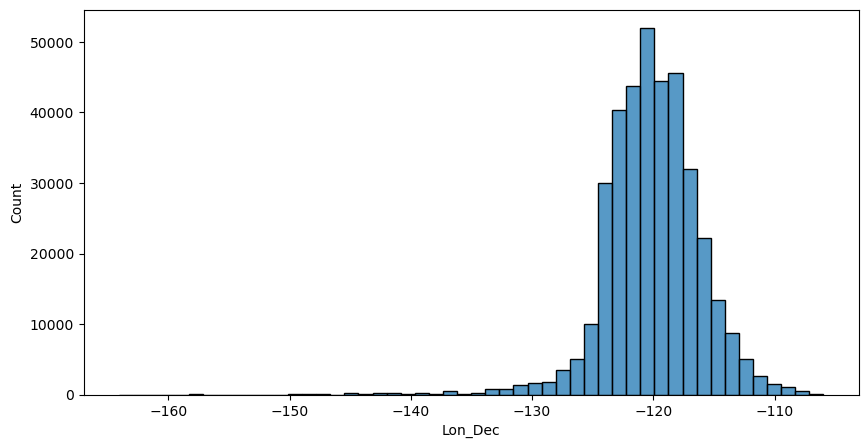

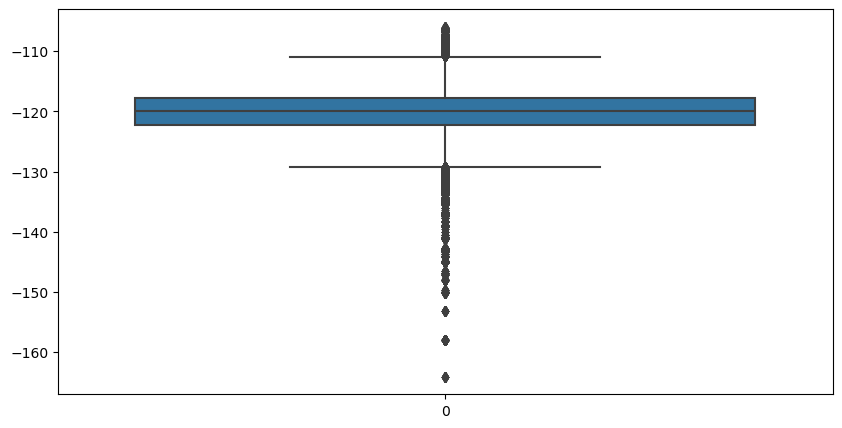

In [46]:
hist_plot(train_df['Lon_Dec'])
box_plot(train_df['Lon_Dec'])

Make sure that there are now no inappropriate negative values.

In [47]:
train_df.min()

R_Depth         0.000000
R_TEMP          1.440000
R_SALINITY     28.431000
R_SIGMA        20.934000
R_SVA           7.300000
R_DYNHT         0.000000
R_O2            0.000000
R_O2Sat         0.000000
R_SIO3          0.000000
R_PO4           0.000000
R_NO3           0.000000
R_NO2           0.000000
R_NH4           0.000000
R_CHLA          0.000000
R_PHAEO         0.000000
R_PRES          0.000000
Lat_Dec        18.416666
Lon_Dec      -164.083333
dtype: float64

In [48]:
test_df.min()

R_Depth         0.000000
R_TEMP          1.440000
R_SALINITY     29.170000
R_SIGMA        21.200000
R_SVA          14.700000
R_DYNHT         0.000000
R_O2            0.000000
R_O2Sat         0.000000
R_SIO3          0.000000
R_PO4           0.000000
R_NO3           0.000000
R_NO2           0.000000
R_NH4           0.000000
R_CHLA          0.000000
R_PHAEO         0.000000
R_PRES          0.000000
Lat_Dec        18.416666
Lon_Dec      -164.083333
dtype: float64

## Save the data

Save train and test split in separate files.

In [49]:
train_df.to_csv(f'../data/barely_processed_train.csv')
test_df.to_csv(f'../data/barely_processed_test.csv')